In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("dataset/train.csv")
test = pd.read_csv("dataset/test.csv")

In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [5]:
train.shape

(31962, 3)

In [6]:
combi = train.append(test, ignore_index=True)

/home/rodixxi/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [7]:
combi.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [8]:
combi.tail()

,id,label,tweet
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


In [9]:
df = combi

In [10]:
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.stem.porter import PorterStemmer
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
stops = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /home/rodixxi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/rodixxi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rodixxi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
def remove_etiquetes(tweet):
    return re.sub(r'@[A-Za-z0-9]+','',tweet)

In [12]:
def decode_tweet(tweet):
    return BeautifulSoup(tweet, 'lxml').get_text()

In [13]:
def remove_puntuation(tweet):
    return re.sub('[^\w\s]','',tweet)

In [14]:
def remove_digits(tweet):
    tweet = tweet.split()
    return ' '.join([w for w in tweet if not w.isdigit()])

In [15]:
def noice_reduction(tweet):
    tweet = decode_tweet(tweet)
    tweet = remove_etiquetes(tweet)
    #tweet = remove_puntuation(tweet)
    tweet = remove_digits(tweet)
    tweet = tweet.lower()
    tweet = tweet.split()
    return ' '.join([lemmatizer.lemmatize(w) for w in tweet if not w in stops])

In [16]:
df['tweet'] = df['tweet'].apply(lambda x : noice_reduction(x))

In [17]:
df.head()

,id,label,tweet
0,1,0.0,father dysfunctional selfish drag kid dysfunct...
1,2,0.0,thanks #lyft credit can't use cause offer whee...
2,3,0.0,bihday majesty
3,4,0.0,#model love u take u time urð±!!! ððð...
4,5,0.0,factsguide: society #motivation


In [18]:
df.tail()

,id,label,tweet
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like mermaid ð #hairflip #neverread...
49156,49157,NaN,#hillary #campaigned today #ohio((omg)) & used...
49157,49158,NaN,"happy, work conference: right mindset lead cul..."
49158,49159,NaN,"song ""so glad"" free download! #shoegaze #newmu..."


In [19]:
freq = pd.Series(' '.join(df['tweet']).split())
freq = freq[freq.str.len() <= 3].value_counts()[:10]
freq

day    2718
&      2373
u      2294
-      1946
.      1555
i'm    1525
get    1494
new    1401
â¦    1338
one    1124
dtype: int64

In [20]:
df['tweet'] = df['tweet'].apply(lambda x: ' '.join([w for w in x.split() if w not in freq]))
df['tweet'].head()

0    father dysfunctional selfish drag kid dysfunct...
1    thanks #lyft credit can't use cause offer whee...
2                                       bihday majesty
3    #model love take time urð±!!! ðððð...
4                      factsguide: society #motivation
Name: tweet, dtype: object

In [21]:
freq = pd.Series(' '.join(df['tweet']).split()).value_counts()[-100:]
freq

#walkalone                          1
kuno!                               1
change:                             1
functions..                         1
memphis!                            1
#peterkogler                        1
#gosnell                            1
#missiesquad                        1
#stephcurry                         1
#tbstorm                            1
again!!!!!                          1
#teamgryfindor                      1
#manmachinepoem                     1
#poisonivy                          1
sir:jerry                           1
ðððððððchar    1
kijiji.                             1
abba                                1
#pasha                              1
gramps                              1
everyone....                        1
fixtures,                           1
#lovedad                            1
ððð#feeling                1
"because                            1
#indiaclicks                        1
#stoney     

In [22]:
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['tweet'].head()

0    father dysfunctional selfish drag kid dysfunct...
1    thanks #lyft credit can't use cause offer whee...
2                                       bihday majesty
3    #model love take time urð±!!! ðððð...
4                      factsguide: society #motivation
Name: tweet, dtype: object

In [23]:
df = combi[:31962]
df['label'] = df['label'].apply(int)
df_test = combi[31962:]

/home/rodixxi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2

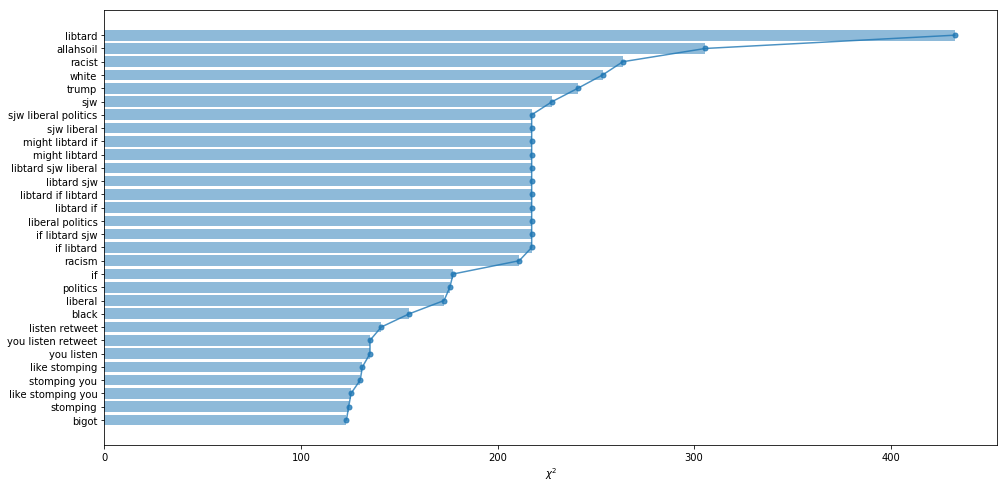

In [25]:
tfidf = TfidfVectorizer(max_features=30000,ngram_range=(1, 3))
X_tfidf = tfidf.fit_transform(df['tweet'])
y = df['label']
chi2score = chi2(X_tfidf, y)[0]
plt.figure(figsize=(16,8))
scores = list(zip(tfidf.get_feature_names(), chi2score))
chi2 = sorted(scores, key=lambda x:x[1])
topchi2 = list(zip(*chi2[-30:]))
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.5)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$')
plt.show();

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [27]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15249009468776982162
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 18271391198184078612
physical_device_desc: "device: XLA_CPU device"
]


In [28]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

[]

In [29]:
import tensorflow as tf

In [30]:
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [31]:
import keras

In [32]:
config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 6} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

In [33]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6046873242900223850
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 16641968078560733642
physical_device_desc: "device: XLA_CPU device"
]


In [34]:
max_fatures = 2500
vectorizer = TfidfVectorizer(analyzer='word', 
                             tokenizer=nltk.word_tokenize, 
                             min_df=0.00002,
                             max_features=max_fatures,
                             ngram_range=(1,3))

In [35]:
X1 = vectorizer.fit_transform(df['tweet']).toarray()
Y1 = df['label']
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1,test_size = 0.20, stratify=Y1)
print(X1_train.shape,Y1_train.shape)
print(X1_test.shape,Y1_test.shape)

(25569, 2500) (25569,)
(6393, 2500) (6393,)


In [36]:
embed_dim = 150
lstm_out = 200
model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X1.shape[1], dropout=0.2))
model.add(LSTM(lstm_out, dropout_U=0.2,dropout_W=0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['acc'])
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/home/rodixxi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  after removing the cwd from sys.path.
/home/rodixxi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(200, dropout=0.2, recurrent_dropout=0.2)`
  """


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 2500, 150)         375000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               280800    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 656,001
Trainable params: 656,001
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
batch_size = 32
model.fit(X1_train, Y1_train, epochs = 5, batch_size=batch_size, verbose = 2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
 - 1231s - loss: 0.2592 - acc: 0.9298
Epoch 2/5
 - 1233s - loss: 0.2552 - acc: 0.9298
Epoch 3/5
 - 1223s - loss: 0.2549 - acc: 0.9298
Epoch 4/5
 - 1229s - loss: 0.2548 - acc: 0.9298
Epoch 5/5
 - 1218s - loss: 0.2547 - acc: 0.9298


In [52]:
score,acc = model.evaluate(X1_test, Y1_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))
#score: 0.24
#acc: 0.96

score: 0.26
acc: 0.93


In [68]:
Y1_test.reset_index(inplace=True, drop=True)

In [ ]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X1_test)):
    result = model.predict(X1_test[x].reshape(1,X1_test.shape[1]),batch_size=1,verbose = 2)
    if np.argmax(result) == np.argmax(Y1_test[x]):
        if np.argmax(Y1_test[x]) == 0:
            pos_correct += 1
        else:
            neg_correct += 1
       
    if np.argmax(Y1_test[x]) == 0:
        pos_cnt += 1
    else:
        neg_cnt += 1



print("pos_acc", pos_correct/pos_cnt*100, "%")
print("neg_acc", neg_correct/neg_cnt*100, "%")
#pos_acc 65.625 
#neg_acc 98.13288477712364

In [ ]:
model.fit(X1, Y1, epochs = 4, batch_size=batch_size, verbose = 2)

In [ ]:
df_test.sample(5)

In [ ]:
dtest = vectorizer.transform(df_test['tweet']).toarray()

In [ ]:
dtest.shape

In [ ]:
test_pred = model.predict(dtest)

In [ ]:
len(test_pred)

In [ ]:
test_pred_df = pd.DataFrame(test_pred)

In [ ]:
test_pred_df.head()

In [ ]:
df_test = df_test.reset_index()

In [ ]:
df_test['label'] = test_pred_df.apply(lambda x: 0 if x > 0.8 else 1)

In [ ]:
df_test['label'].value_counts()

In [ ]:
submission = df_test[['id','label']]

In [ ]:
submission.to_csv('result/sub_rodixxi_nn_kaggle_3.csv', index=False)